In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('DataCUSAAssgn1_2.xls')
data.head()

,Srl No,1,2,3,4,5,6,7,8,9,...,Phone,SoftDrink,Newspaper,ShowerGel,Hand sanitizers,Face washes,Hair conditioner,Tea_Coffee,Gender,Occupation
0,1,4,9,4,6,9,8,9,8,8,...,Samsung,Cola,Economic Times,3,4,4,3,1,1,1
1,2,9,6,9,1,5,9,8,8,9,...,Others,Orange,The Hindu,1,2,2,3,1,1,1
2,3,4,6,5,7,6,5,0,5,3,...,HTC,Fruit flavour,Times of India,2,3,4,3,2,1,1
3,4,6,9,5,10,10,5,6,5,4,...,Others,I do not consume soft drinks at all,The Hindu,3,3,4,3,1,2,1
4,5,8,1,9,7,8,9,1,1,7,...,Others,Fruit flavour,Economic Times,2,3,2,2,1,1,1


In [3]:
bevrages = data.loc[:,[2,4,15,3,6,7,9,'SoftDrink']]
bevrages.head()

,2,4,15,3,6,7,9,SoftDrink
0,9,6,7,4,8,9,8,Cola
1,6,1,2,9,9,8,9,Orange
2,6,7,3,5,5,0,3,Fruit flavour
3,9,10,6,5,5,6,4,I do not consume soft drinks at all
4,1,7,2,9,9,1,7,Fruit flavour


In [4]:
bevs = sorted(bevrages.SoftDrink.unique())

## Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
l = LabelEncoder()
a = l.fit_transform(bevrages.SoftDrink)
bevrages['SoftDrink'] = a
bevrages.head()

,2,4,15,3,6,7,9,SoftDrink
0,9,6,7,4,8,9,8,0
1,6,1,2,9,9,8,9,3
2,6,7,3,5,5,0,3,1
3,9,10,6,5,5,6,4,2
4,1,7,2,9,9,1,7,1


## Standardization

In [6]:
std = StandardScaler()
bevrages_std = std.fit_transform(bevrages.drop(['SoftDrink'],axis=1))
bevrages_std = pd.DataFrame(bevrages_std)
bevrages_std.head()

,0,1,2,3,4,5,6
0,1.431301,0.087155,0.838655,-0.854184,0.971368,1.424440,0.856379
1,0.297597,-1.526832,-0.968791,0.972948,1.296240,1.114442,1.169784
2,0.297597,0.409953,-0.607302,-0.488758,-0.003249,-1.365540,-0.710646
3,1.431301,1.378345,0.477166,-0.488758,-0.003249,0.494446,-0.397241
4,-1.591909,0.409953,-0.968791,0.972948,1.296240,-1.055543,0.542974


In [7]:
bevrages_std['SoftDrink'] = bevrages.loc[:,'SoftDrink']
bevrages_std.columns = bevrages.columns

## Clustering

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import  KMeans

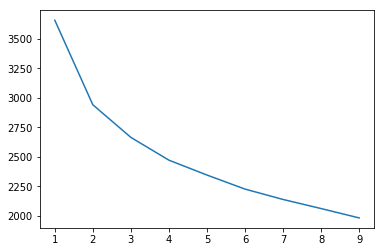

In [9]:
SS = []
for k in range(1,10):
    km = KMeans(n_clusters=k, n_init=100)
    ss = km.fit(bevrages_std).inertia_
    SS.append(ss)
plt.plot(range(1,10),SS)

In [11]:
km = KMeans(n_clusters=3, n_init=100)
fit = km.fit(bevrages_std) 
fit.cluster_centers_

array([[ 0.20413777,  0.25549586,  0.27115587, -0.19012976,  0.15394755,
         0.33778094, -0.22537361,  0.19892473],
       [ 0.07565522,  0.30235354,  0.14723518,  0.09128408,  0.18497094,
         0.01714829,  0.07784136,  3.11111111],
       [-0.53979753, -0.97294062, -0.78393892,  0.27116296, -0.5902339 ,
        -0.7384993 ,  0.36490319,  1.44318182]])

In [12]:
a = fit.labels_
a = a.tolist()
bevrages['bev_clusters'] = np.nan
bevrages['bev_clusters'] = a
bevrages.bev_clusters.value_counts()

0    186
1    126
2     88
Name: bev_clusters, dtype: int64

In [13]:
for i in sorted(bevrages.SoftDrink.unique()):
    print(i)
    print(bevs[i])
    bevrages.loc[bevrages.SoftDrink == i,'SoftDrink'] = bevs[i]

0
Cola
1
Fruit flavour
2
I do not consume soft drinks at all
3
Orange
4
White/ Colourless


In [14]:
bevrages.head()

,2,4,15,3,6,7,9,SoftDrink,bev_clusters
0,9,6,7,4,8,9,8,Cola,0
1,6,1,2,9,9,8,9,Orange,1
2,6,7,3,5,5,0,3,Fruit flavour,0
3,9,10,6,5,5,6,4,I do not consume soft drinks at all,1
4,1,7,2,9,9,1,7,Fruit flavour,2


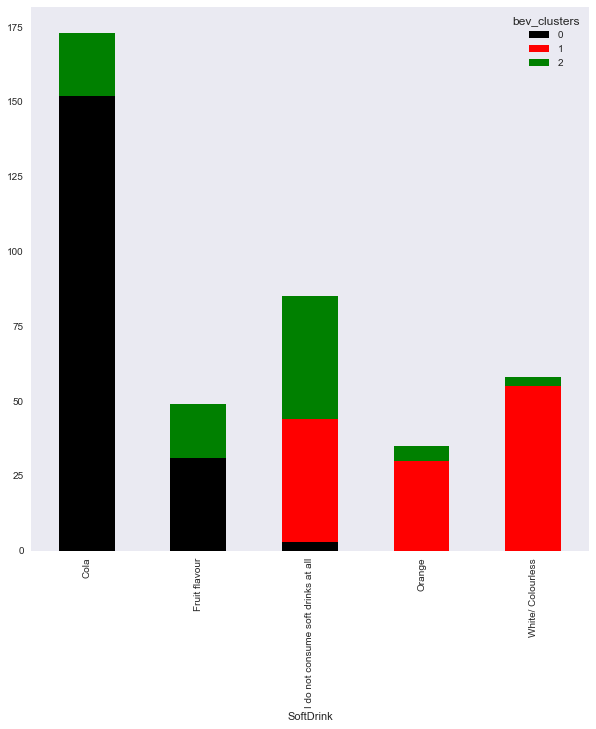

In [54]:
var = bevrages.groupby(['SoftDrink','bev_clusters']).SoftDrink.count()
var.unstack().plot(kind='bar',stacked=True,  color=['black','red','green','yellow'], grid=False,figsize=(10,10))
plt.savefig('counts.png')

In [16]:
print(bevrages[bevrages['bev_clusters']==0]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==1]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==2]['SoftDrink'].value_counts())
#print(bevrages[bevrages['bev_clusters']==3]['SoftDrink'].value_counts())

Cola                                   152
Fruit flavour                           31
I do not consume soft drinks at all      3
Name: SoftDrink, dtype: int64
White/ Colourless                      55
I do not consume soft drinks at all    41
Orange                                 30
Name: SoftDrink, dtype: int64
I do not consume soft drinks at all    41
Cola                                   21
Fruit flavour                          18
Orange                                  5
White/ Colourless                       3
Name: SoftDrink, dtype: int64


In [17]:
def dictionary(df):
    dict1 = {}
    for i in range(0,5):
        try:
            key,val = df.value_counts().index[i],df.value_counts()[df.value_counts().index[i]]
            dict1[key] = val
        except:
            pass
    return dict1

In [18]:
a = dictionary(bevrages.SoftDrink)
b = dictionary(bevrages[bevrages['bev_clusters']==0]['SoftDrink'])
b1 = dictionary(bevrages[bevrages['bev_clusters']==1]['SoftDrink'])
b2 = dictionary(bevrages[bevrages['bev_clusters']==2]['SoftDrink'])

In [19]:
a.keys()
def perc(main,sec):
    dict2 = {}
    for i in sorted(a.keys()):
        try:
            print(i,'-->',sec[i])
            print(i,'-->',main[i])
            dict2[i] = (sec[i]/main[i])*100
        except:
            print(i)
            pass
    return dict2

In [20]:
x = perc(a,b)
x1 = perc(a,b1)
x2 = perc(a,b2)

Cola --> 152
Cola --> 173
Fruit flavour --> 31
Fruit flavour --> 49
I do not consume soft drinks at all --> 3
I do not consume soft drinks at all --> 85
Orange
White/ Colourless
Cola
Fruit flavour
I do not consume soft drinks at all --> 41
I do not consume soft drinks at all --> 85
Orange --> 30
Orange --> 35
White/ Colourless --> 55
White/ Colourless --> 58
Cola --> 21
Cola --> 173
Fruit flavour --> 18
Fruit flavour --> 49
I do not consume soft drinks at all --> 41
I do not consume soft drinks at all --> 85
Orange --> 5
Orange --> 35
White/ Colourless --> 3
White/ Colourless --> 58


In [21]:
range(len(x)), x.values()

(range(0, 3),
 dict_values([87.86127167630057, 63.26530612244898, 3.5294117647058822]))

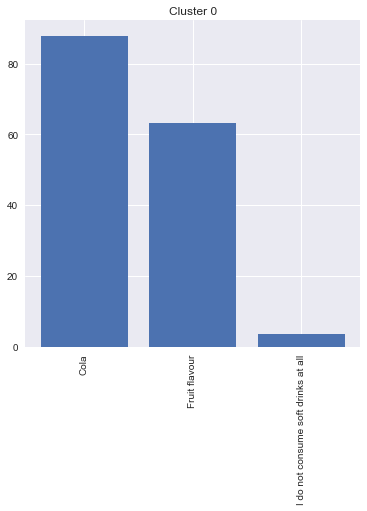

In [58]:
plt.figure(figsize=(6,6))
plt.bar(range(len(x)), x.values(), align='center')
plt.xticks(range(len(x)), list(x.keys()),rotation=90)
plt.title("Cluster 0")
plt.savefig('0.png')

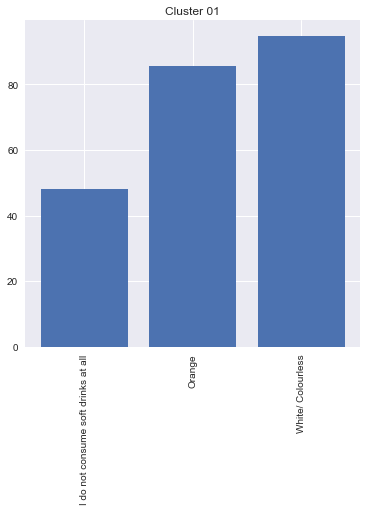

In [57]:
plt.figure(figsize=(6,6))
plt.bar(range(len(x1)), x1.values(), align='center',)
plt.xticks(range(len(x1)), list(x1.keys()),rotation=90)
plt.title("Cluster 01")
plt.savefig('1.png')

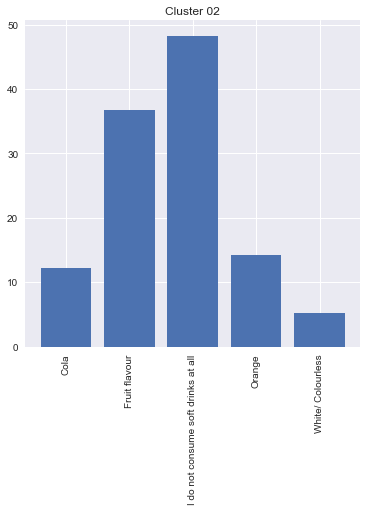

In [56]:
plt.figure(figsize=(6,6))
plt.bar(range(len(x2)),x2.values(), align='center')
plt.xticks(range(len(x2)), list(x2.keys()),rotation=90)
plt.title("Cluster 02")
plt.savefig('2.png')


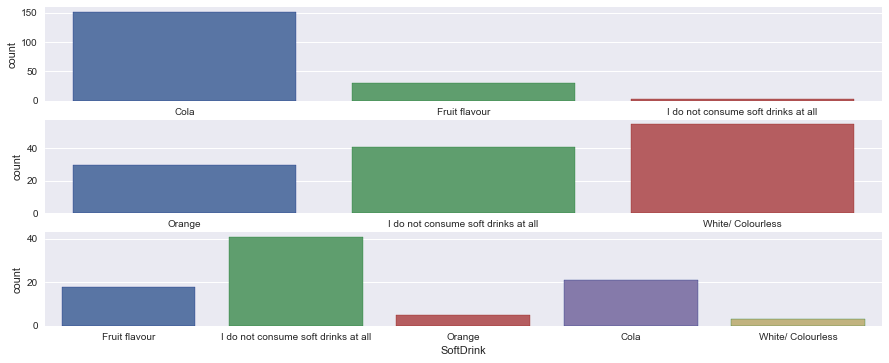

In [27]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
for i in sorted(z):
    plt.subplot(5,1,i+1)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x="SoftDrink", data=bevrages[bevrages['bev_clusters']==i][['SoftDrink','bev_clusters']],edgecolor=sns.color_palette("dark", 3));

In [28]:
bevrages.columns

Index([2, 4, 15, 3, 6, 7, 9, 'SoftDrink', 'bev_clusters'], dtype='object')

# 2 - I always use new brands…

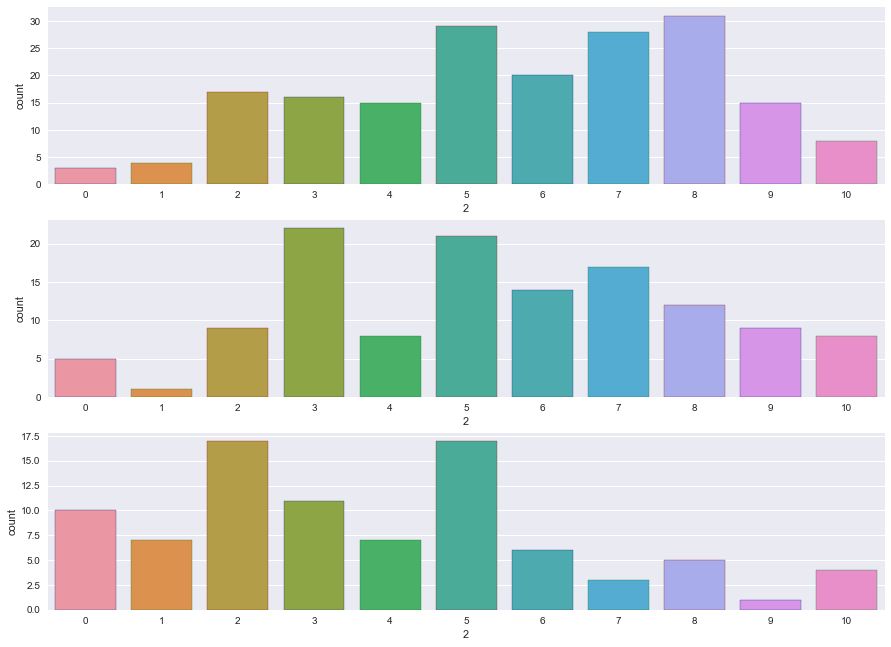

In [29]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=2, data=bevrages[bevrages['bev_clusters']==i][[2,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 3 - Weekends at home with family…

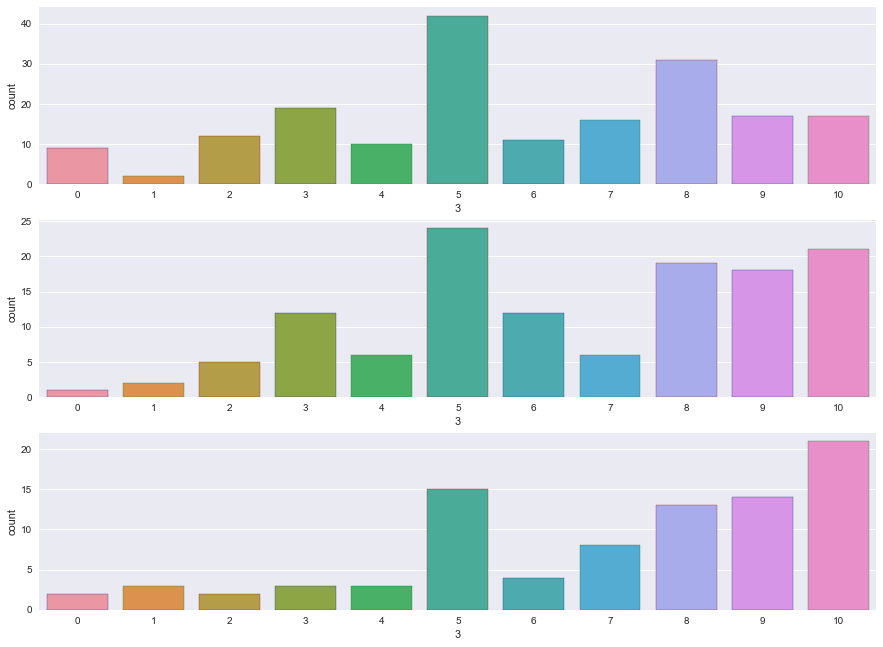

In [30]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=3, data=bevrages[bevrages['bev_clusters']==i][[3,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 4 - Buy more by impulse while shopping…

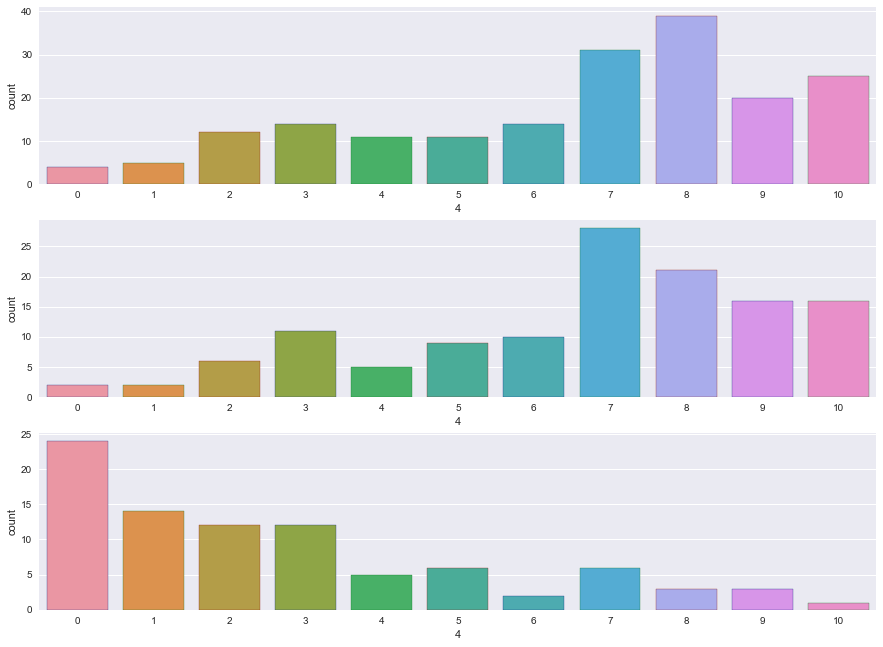

In [43]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=4, data=bevrages[bevrages['bev_clusters']==i][[4,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1
plt.savefig("4.png")

# 6 -  Prefer reading, music rather than sports wctivities

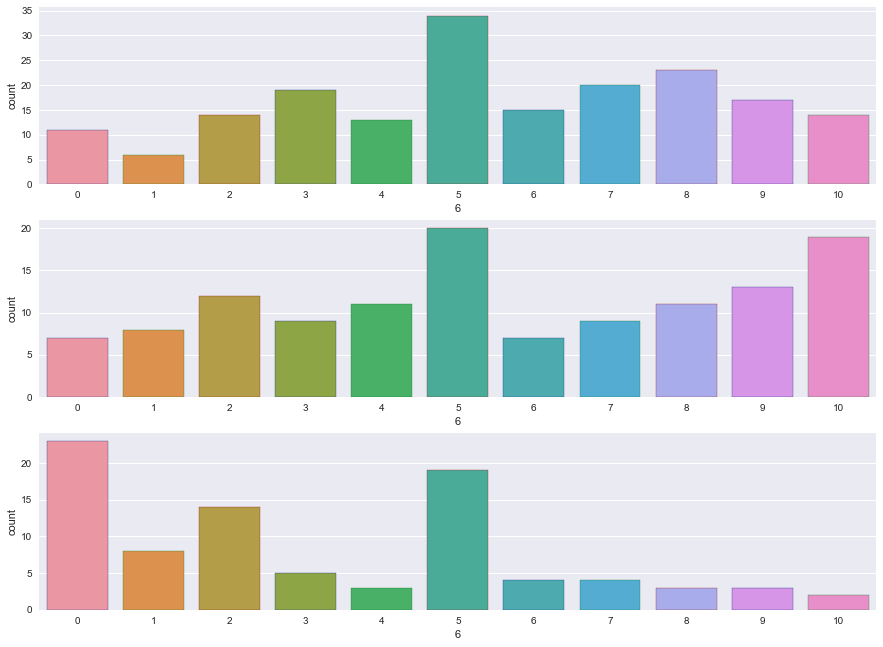

In [32]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=6, data=bevrages[bevrages['bev_clusters']==i][[6,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 7 - Watch movies in first few days of release

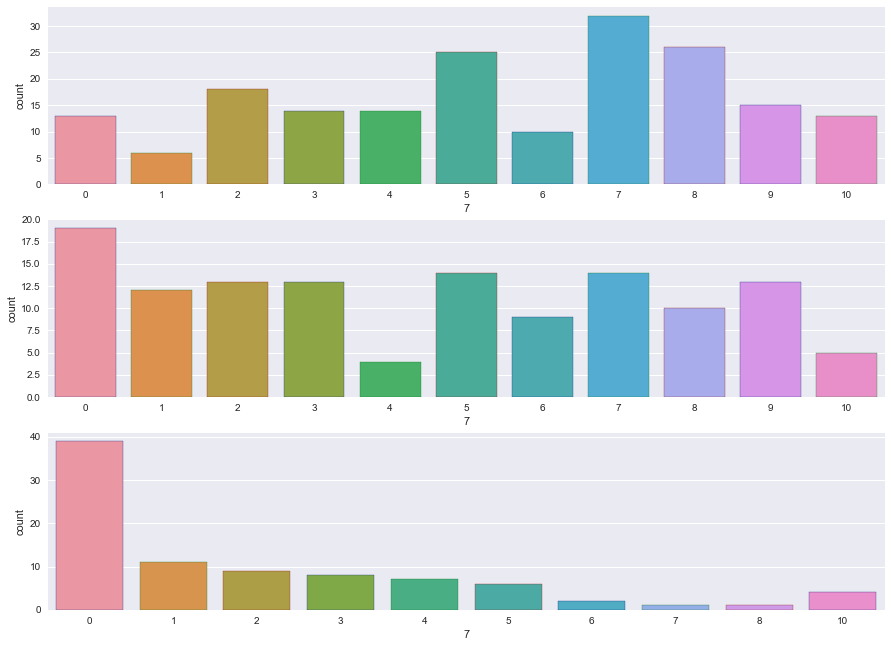

In [33]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=7, data=bevrages[bevrages['bev_clusters']==i][[7,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 9 - Some physical exercise everyday

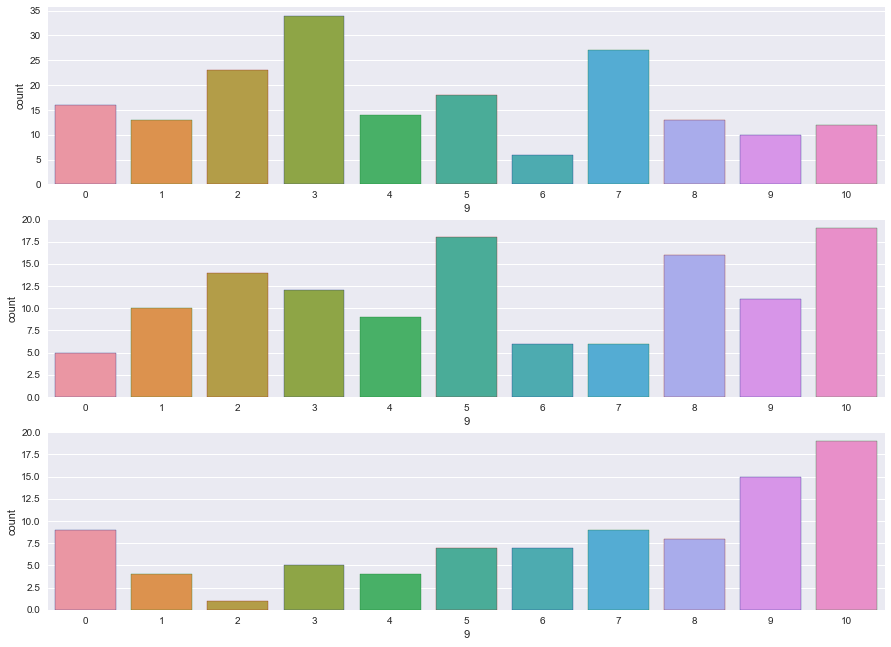

In [34]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=9, data=bevrages[bevrages['bev_clusters']==i][[9,'bev_clusters']],edgecolor=sns.color_palette("dark", 3))
    counter = counter+1

# 15 - When I see a new, interesting ad I most often end up buying the brand

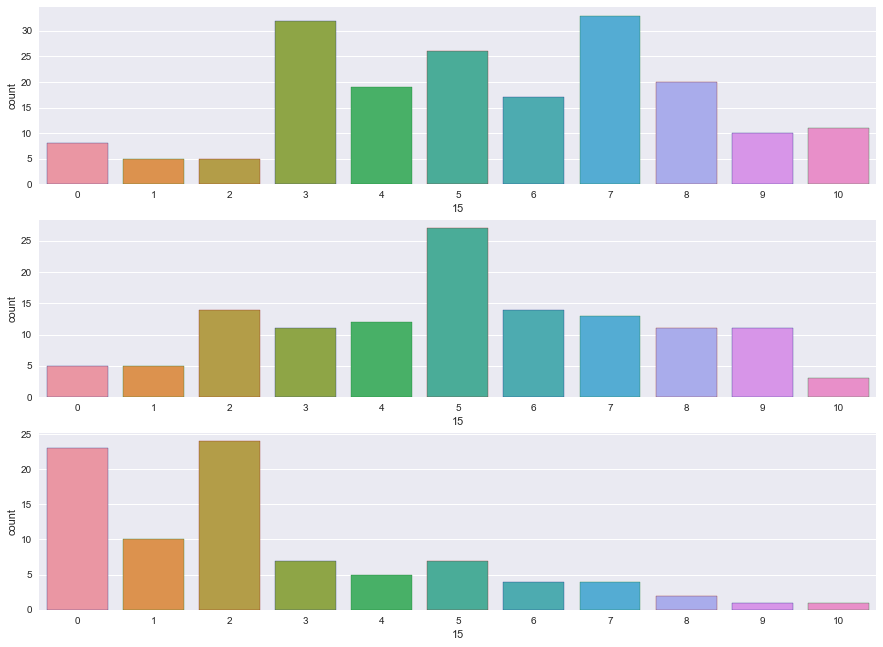

In [35]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(4,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=15, data=bevrages[bevrages['bev_clusters']==i][[15,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

In [ ]:
bevrages.head()

In [39]:
print(bevrages[bevrages['bev_clusters']==0][2].mean())
print(bevrages[bevrages['bev_clusters']==0][4].mean())
print(bevrages[bevrages['bev_clusters']==0][15].mean())
print(bevrages[bevrages['bev_clusters']==0][3].mean())
print(bevrages[bevrages['bev_clusters']==0][6].mean())
print(bevrages[bevrages['bev_clusters']==0][7].mean())
print(bevrages[bevrages['bev_clusters']==0][9].mean())

5.752688172043011
6.521505376344086
5.43010752688172
5.817204301075269
5.483870967741935
5.494623655913978
4.548387096774194


In [40]:
print(bevrages[bevrages['bev_clusters']==1][2].mean())
print(bevrages[bevrages['bev_clusters']==1][4].mean())
print(bevrages[bevrages['bev_clusters']==1][15].mean())
print(bevrages[bevrages['bev_clusters']==1][3].mean())
print(bevrages[bevrages['bev_clusters']==1][6].mean())
print(bevrages[bevrages['bev_clusters']==1][7].mean())
print(bevrages[bevrages['bev_clusters']==1][9].mean())

5.412698412698413
6.666666666666667
5.087301587301587
6.587301587301587
5.579365079365079
4.4603174603174605
5.515873015873016


In [41]:
print(bevrages[bevrages['bev_clusters']==2][2].mean())
print(bevrages[bevrages['bev_clusters']==2][4].mean())
print(bevrages[bevrages['bev_clusters']==2][15].mean())
print(bevrages[bevrages['bev_clusters']==2][3].mean())
print(bevrages[bevrages['bev_clusters']==2][6].mean())
print(bevrages[bevrages['bev_clusters']==2][7].mean())
print(bevrages[bevrages['bev_clusters']==2][9].mean())

3.784090909090909
2.715909090909091
2.5113636363636362
7.079545454545454
3.1931818181818183
2.022727272727273
6.431818181818182


In [42]:
silhouette_score(X=bevrages_std,labels=fit.labels_)

0.16277880736726807

In [81]:
from sklearn.decomposition import PCA
p = PCA(n_components = 8)

In [82]:
df_pcs = pd.DataFrame(p.fit_transform(bevrages_std), columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7','p8'])
df_pcs.head()

,p1,p2,p3,p4,p5,p6,p7,p8
0,-1.955029,1.191442,-0.980886,0.319528,0.898933,-0.012416,1.290230,0.563871
1,1.833344,0.123632,0.008037,-1.057788,1.909267,0.563591,1.442793,0.792764
2,-0.259426,-0.609208,0.559378,0.266133,-0.807464,-1.108633,0.059371,-0.726785
3,-0.125083,1.855202,-0.404733,0.285104,-0.361040,-0.434282,0.356828,-1.093247
4,0.325354,-1.018764,1.346005,-1.040433,-1.268701,0.518393,0.582708,1.052956


In [83]:
p.explained_variance_ratio_

array([0.24526793, 0.16775682, 0.14518064, 0.10744393, 0.091827  ,
       0.09140501, 0.06801433, 0.06280602])

In [84]:
fit1 = km.fit(df_pcs)

In [85]:
silhouette_score(X=df_pcs,labels=fit1.labels_)

0.15935184607739158

In [86]:
fit1.labels_

array([1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2,
       1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2,
       0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0,
       1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1,

In [87]:
bevrages.bev_clusters = fit1.labels_

In [88]:
print(bevrages[bevrages['bev_clusters']==0]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==1]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==2]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==3]['SoftDrink'].value_counts())

White/ Colourless                      55
I do not consume soft drinks at all    37
Orange                                 30
Name: SoftDrink, dtype: int64
Cola                                   150
Fruit flavour                           31
I do not consume soft drinks at all      4
Name: SoftDrink, dtype: int64
I do not consume soft drinks at all    44
Cola                                   23
Fruit flavour                          18
Orange                                  5
White/ Colourless                       3
Name: SoftDrink, dtype: int64
Series([], Name: SoftDrink, dtype: int64)


In [89]:
df_overall = pd.concat([df_pcs, bevrages_std], axis = 1)
df_overall.head()

,p1,p2,p3,p4,p5,p6,p7,p8,2,4,15,3,6,7,9,SoftDrink,Gender
0,-1.955029,1.191442,-0.980886,0.319528,0.898933,-0.012416,1.290230,0.563871,1.431301,0.087155,0.838655,-0.854184,0.971368,1.424440,0.856379,0,1
1,1.833344,0.123632,0.008037,-1.057788,1.909267,0.563591,1.442793,0.792764,0.297597,-1.526832,-0.968791,0.972948,1.296240,1.114442,1.169784,3,1
2,-0.259426,-0.609208,0.559378,0.266133,-0.807464,-1.108633,0.059371,-0.726785,0.297597,0.409953,-0.607302,-0.488758,-0.003249,-1.365540,-0.710646,1,1
3,-0.125083,1.855202,-0.404733,0.285104,-0.361040,-0.434282,0.356828,-1.093247,1.431301,1.378345,0.477166,-0.488758,-0.003249,0.494446,-0.397241,2,2
4,0.325354,-1.018764,1.346005,-1.040433,-1.268701,0.518393,0.582708,1.052956,-1.591909,0.409953,-0.968791,0.972948,1.296240,-1.055543,0.542974,1,1


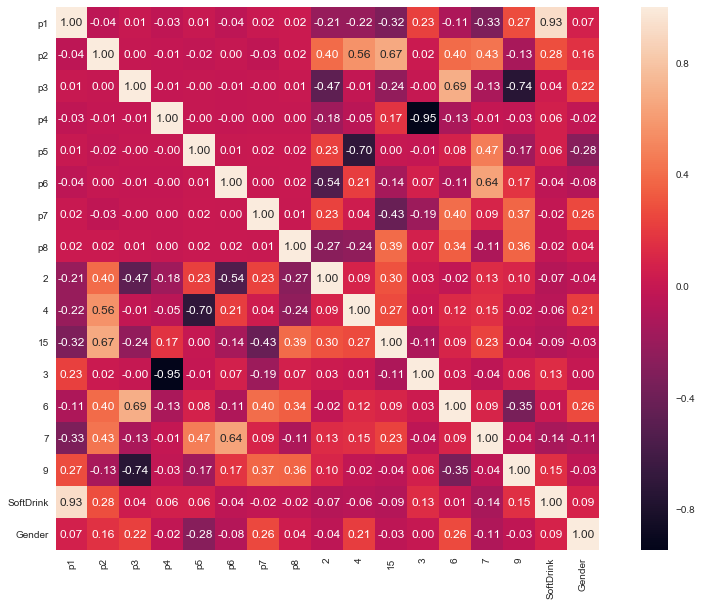

In [90]:
c = df_overall.corr(method='spearman')
sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(15,10)})
heatmap = sns.heatmap(c, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=df_overall.columns.values, xticklabels=df_overall.columns.values)

In [91]:
p.explained_variance_ratio_

array([0.24526793, 0.16775682, 0.14518064, 0.10744393, 0.091827  ,
       0.09140501, 0.06801433, 0.06280602])

In [92]:
2,4,15,3,6,7,9,'SoftDrink'

(2, 4, 15, 3, 6, 7, 9, 'SoftDrink')

In [93]:
print("Q2" )
print(round(0.21466441 * 0.70 * 100))

#print("Relative Importance of V15 - When I see a new, interesting ad I most often end up buying the brand  : " )
#print(round(0.2076631 * 0.63 * 100))

#print("Relative Importance of V8 - I order for everyone while eating out  : " )
#print(round(0.1509153 * 0.62 * 100))

Q2
15


In [94]:
bevrages_std.head()

,2,4,15,3,6,7,9,SoftDrink,Gender
0,1.431301,0.087155,0.838655,-0.854184,0.971368,1.424440,0.856379,0,1
1,0.297597,-1.526832,-0.968791,0.972948,1.296240,1.114442,1.169784,3,1
2,0.297597,0.409953,-0.607302,-0.488758,-0.003249,-1.365540,-0.710646,1,1
3,1.431301,1.378345,0.477166,-0.488758,-0.003249,0.494446,-0.397241,2,2
4,-1.591909,0.409953,-0.968791,0.972948,1.296240,-1.055543,0.542974,1,1


In [65]:
k = bevrages_std.loc[:,[15,6,3,'SoftDrink']]

In [66]:
k.head()

,15,6,3,SoftDrink
0,0.838655,0.971368,-0.854184,0
1,-0.968791,1.296240,0.972948,3
2,-0.607302,-0.003249,-0.488758,1
3,0.477166,-0.003249,-0.488758,2
4,-0.968791,1.296240,0.972948,1


In [67]:
km1 = KMeans(n_clusters=3, n_init=100)
km1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
fit2 = km1.fit(k)

In [69]:
fit2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
silhouette_score(X=k,labels=fit2.labels_)

0.21329810115723685

In [74]:
bevrages_std['bev_clusters'] = fit2.labels_

In [75]:
print(bevrages_std[bevrages_std['bev_clusters']==0]['SoftDrink'].value_counts())
print(bevrages_std[bevrages_std['bev_clusters']==1]['SoftDrink'].value_counts())
print(bevrages_std[bevrages_std['bev_clusters']==2]['SoftDrink'].value_counts())
print(bevrages_std[bevrages_std['bev_clusters']==3]['SoftDrink'].value_counts())

0    86
1    20
2    13
Name: SoftDrink, dtype: int64
2    72
4    58
3    35
Name: SoftDrink, dtype: int64
0    87
1    29
Name: SoftDrink, dtype: int64
Series([], Name: SoftDrink, dtype: int64)


In [76]:
bevrages_std.head()

,2,4,15,3,6,7,9,SoftDrink,bev_clusters
0,1.431301,0.087155,0.838655,-0.854184,0.971368,1.424440,0.856379,0,0
1,0.297597,-1.526832,-0.968791,0.972948,1.296240,1.114442,1.169784,3,1
2,0.297597,0.409953,-0.607302,-0.488758,-0.003249,-1.365540,-0.710646,1,0
3,1.431301,1.378345,0.477166,-0.488758,-0.003249,0.494446,-0.397241,2,1
4,-1.591909,0.409953,-0.968791,0.972948,1.296240,-1.055543,0.542974,1,2


In [104]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
links = linkage(y=bevrages_std,method='complete')
links.shape

(399, 4)

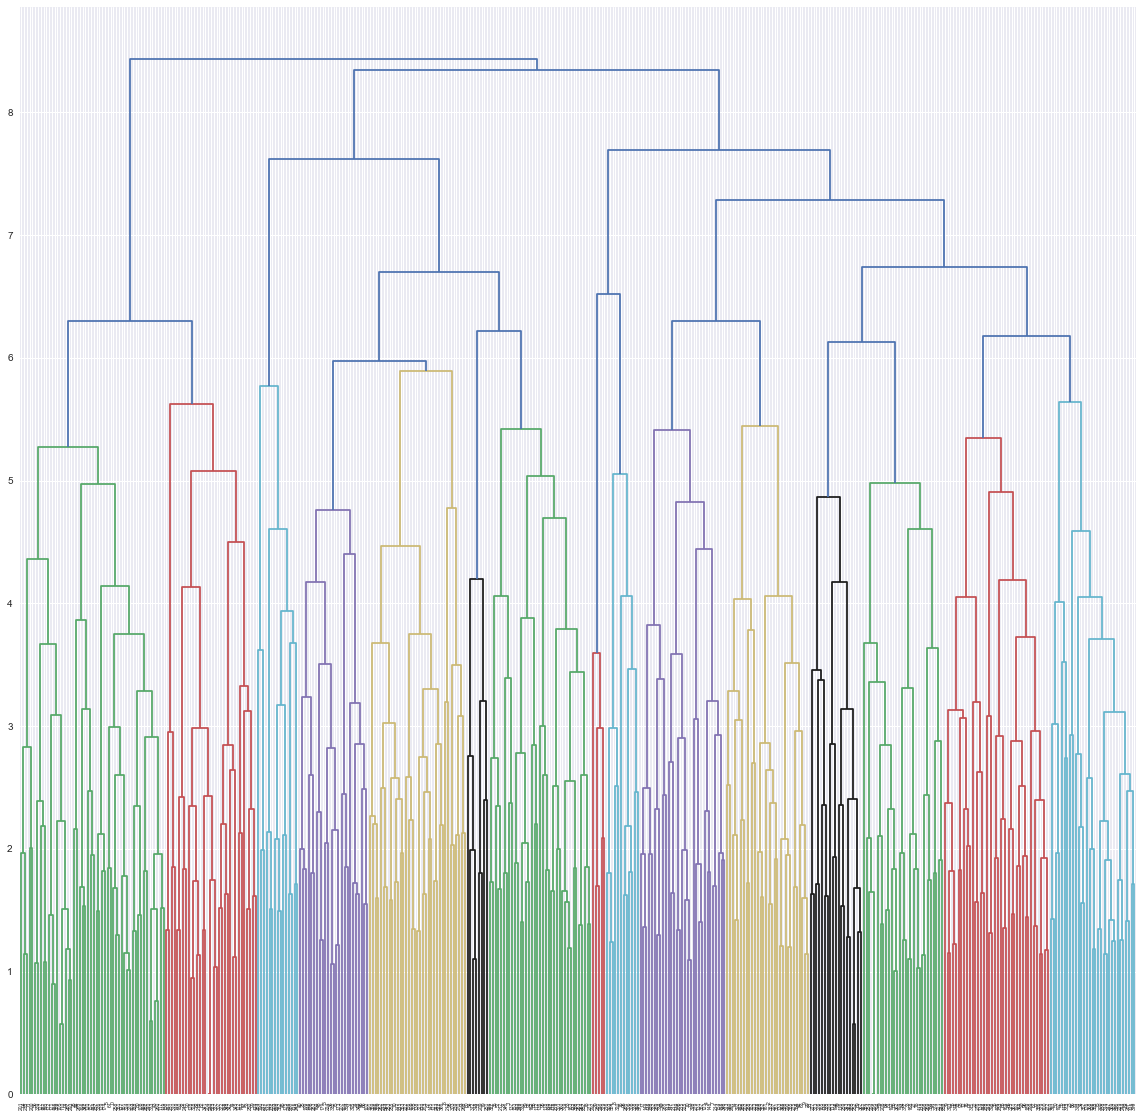

In [106]:
plt.figure(figsize=[20,20])
dendrogram(links)
plt.show()